## In this file, I create holdback set with single posts.
## Resources
[NLTK][https://stackabuse.com/text-classification-with-python-and-scikit-learn/]

In [1]:
import nltk
import pickle
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score, precision_score, classification_report, plot_confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [3]:
train_size = 0.8
vectorizer_max_features = 1500
chosen_classifier = MultinomialNB

In [4]:
from functions import load_data_set, sanitize_posts
myers_briggs = load_data_set()

In [5]:
mb_df = pd.DataFrame(myers_briggs, columns=['type', 'posts'])
types = sorted(mb_df['type'].unique())

post_list = [re.split('\|\|\|+', post) for post in mb_df['posts']]
post_df = pd.DataFrame(post_list)
post_df.insert(loc=0, column='type', value=mb_df['type'])

posts_by_type = {typ: mb_df[mb_df['type'] == typ] for typ in types}

In [ ]:
vertical_post_df = pd.read_csv('vertical_posts.csv', index_col=0)

In [6]:
X, y = mb_df['posts'], mb_df['type']
# X, y = vertical_post_df['posts'], vertical_post_df['type']

## Might want to remove URLs

In [7]:
X_train_test, X_holdback, y_train_test, y_holdback = train_test_split(X, y, train_size=train_size, random_state=56)

In [8]:
sanitized_train_test = sanitize_posts(X_train_test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(sanitized_train_test, y_train_test, train_size=train_size, random_state=56)

In [10]:
vectorizer = CountVectorizer(max_features=vectorizer_max_features, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X_vectorized = vectorizer.fit_transform(X_train).toarray()

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vectorized).toarray()

In [12]:
classifier = chosen_classifier()
classifier.fit(X_tfidf, y_train)

MultinomialNB()

In [15]:
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)

In [16]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [13]:
X_test_vectorized = vectorizer.transform(X_test)
X_test_tfidf = tfidfconverter.transform(X_test_vectorized)
y_pred = classifier.predict(X_test_tfidf)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0   0   0   0   0   0   0   8  13   1   1   0   0   0   0]
 [  0   5   0   1   0   0   0   0  22  70   4   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7  20   5   9   0   0   0   0]
 [  0   1   0  15   0   0   0   0  24  26   2  41   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   6   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   2   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7   6   1   3   0   0   0   0]
 [  0   0   0   1   0   0   0   0 113 106   1   7   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26 262   1  11   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25  52  61  39   0   0   0   0]
 [  0   0   0   0   0   0   0   0  14  61   1 117   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12  26   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4  30   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9  26   3   6   0   0   0 

In [17]:
sanitized_holdback = sanitize_posts(X_holdback)
X_holdback_vectorized = vectorizer.transform(sanitized_holdback)
X_holdback_tfidf = tfidfconverter.transform(X_holdback_vectorized)
y_pred2 = classifier.predict(X_holdback_tfidf)
y_pred2 = model.predict(X_holdback_tfidf)

print(confusion_matrix(y_holdback, y_pred2))
print(classification_report(y_holdback, y_pred2))
print(accuracy_score(y_holdback, y_pred2)) 

[[  0   0   0   0   0   0   0   0  14  17   0   3   0   0   0   0]
 [  0  10   0   2   0   0   0   0  26  86   8   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7  16  12  10   0   0   0   0]
 [  0   0   0  18   0   0   0   0  35  36   5  41   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   1   0   2   0   0   0   0]
 [  0   1   0   0   0   0   0   0   1   3   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   6   1   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11   5   1   1   0   0   0   0]
 [  0   0   0   1   0   0   0   0 141 148   5  11   0   0   0   0]
 [  0   0   0   2   0   0   0   0  23 319   3  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24  79  78  44   0   0   0   0]
 [  0   0   0   1   0   0   0   0  12  82   2 158   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6  27   0   1   0   0   0   0]
 [  0   1   0   1   0   0   0   0   8  42   0   3   0   0   0   0]
 [  0   0   0   1   0   0   0   0   4  29   2   3   0   0   0 

In [18]:
print(chosen_classifier, vectorizer_max_features, train_size)

print("Accuracy:", accuracy_score(y_holdback, y_pred2))
print("Precision:", precision_score(y_holdback, y_pred2, average='micro'))
print("Precision:", precision_score(y_holdback, y_pred2, average=None))
cr = classification_report(y_holdback, y_pred2)
cr.split('\n')

<class 'sklearn.naive_bayes.MultinomialNB'> 1500 0.8
Accuracy: 0.41729106628242074
Precision: 0.41729106628242074
Precision: [0.         0.83333333 0.         0.69230769 0.         0.
 0.         0.         0.43518519 0.34081197 0.66666667 0.49375
 0.         0.         0.         0.        ]


['              precision    recall  f1-score   support',
 '',
 '        ENFJ       0.00      0.00      0.00        34',
 '        ENFP       0.83      0.07      0.14       134',
 '        ENTJ       0.00      0.00      0.00        45',
 '        ENTP       0.69      0.13      0.22       135',
 '        ESFJ       0.00      0.00      0.00         5',
 '        ESFP       0.00      0.00      0.00         6',
 '        ESTJ       0.00      0.00      0.00        11',
 '        ESTP       0.00      0.00      0.00        18',
 '        INFJ       0.44      0.46      0.45       306',
 '        INFP       0.34      0.88      0.49       364',
 '        INTJ       0.67      0.35      0.46       225',
 '        INTP       0.49      0.62      0.55       255',
 '        ISFJ       0.00      0.00      0.00        34',
 '        ISFP       0.00      0.00      0.00        55',
 '        ISTJ       0.00      0.00      0.00        39',
 '        ISTP       0.00      0.00      0.00        69',
 '',
 '  

In [19]:
fpr, tpr, thresholds = roc_curve(y_holdback, classifier.predict_proba(X_holdback_tfidf)[:,1], pos_label='I')

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for E-I');
print("ROC AUC score = ", roc_auc_score(y_holdback, classifier.predict_proba(X_holdback_tfidf)[:,1]))

ValueError: multi_class must be in ('ovo', 'ovr')

# Recreate verticalized holdback to account for vectorizer and tfidf

## Run model on verticalized holdbacks

In [20]:
holdback_df = pd.DataFrame(zip(y_holdback, X_holdback), columns=('type', 'posts'))

In [21]:
holdback_post_list = [re.split('\|\|\|+', post) for post in holdback_df['posts']]
holdback_post_df = pd.DataFrame(holdback_post_list)
holdback_post_df.insert(loc=0, column='type', value=holdback_df['type'])

In [26]:
# Splits posts of holdback set into single posts.
def compress_posts(df):
    result = []
    df_rows = range(len(df))
    df_cols = range(len(df.iloc[0]) - 1)

    for i in df_rows:
        for j in df_cols:
            if df.iloc[i][j] != None:
                result.append([df['type'][i], df.iloc[i][j]])
    
    return pd.DataFrame(result, columns=('type', 'post'))

vertical_holdback = compress_posts(holdback_post_df)

In [27]:
# sanitize and vectorize
sanitized_holdback = sanitize_posts(vertical_holdback['post'])

In [29]:
vertical_X_holdback = vectorizer.transform(sanitized_holdback).toarray()
vertical_X_holdback = tfidfconverter.fit_transform(vertical_X_holdback).toarray()
pred_holdback = classifier.predict(vertical_X_holdback)

In [30]:
print(chosen_classifier, vectorizer_max_features, train_size)

print("Accuracy:", accuracy_score(vertical_holdback['type'], pred_holdback))
print("Precision:", precision_score(vertical_holdback['type'], pred_holdback, average='micro'))
print("Precision:", precision_score(vertical_holdback['type'], pred_holdback, average=None))
cr = classification_report(vertical_holdback['type'], pred_holdback)
cr.split('\n')

<class 'sklearn.naive_bayes.MultinomialNB'> 1500 0.8
Accuracy: 0.24941747111132245
Precision: 0.24941747111132245
Precision: [0.         0.36688312 0.2        0.402746   0.         0.
 0.         0.         0.29578961 0.23431678 0.42956927 0.27575333
 0.         0.16       0.         0.37837838]


['              precision    recall  f1-score   support',
 '',
 '        ENFJ       0.00      0.00      0.00      1666',
 '        ENFP       0.37      0.02      0.03      6387',
 '        ENTJ       0.20      0.00      0.00      2227',
 '        ENTP       0.40      0.03      0.05      6603',
 '        ESFJ       0.00      0.00      0.00       250',
 '        ESFP       0.00      0.00      0.00       266',
 '        ESTJ       0.00      0.00      0.00       552',
 '        ESTP       0.00      0.00      0.00       863',
 '        INFJ       0.30      0.15      0.20     14935',
 '        INFP       0.23      0.87      0.37     17724',
 '        INTJ       0.43      0.07      0.12     10684',
 '        INTP       0.28      0.19      0.23     12386',
 '        ISFJ       0.00      0.00      0.00      1686',
 '        ISFP       0.16      0.00      0.00      2640',
 '        ISTJ       0.00      0.00      0.00      1879',
 '        ISTP       0.38      0.00      0.01      3368',
 '',
 '  

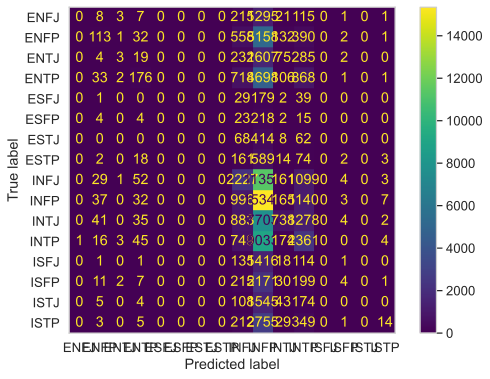

In [31]:
plot_confusion_matrix(classifier, vertical_X_holdback, vertical_holdback['type'])
plt.grid(False)
plt.show()

In [32]:
classifier.predict_proba(vertical_X_holdback)

array([[0.02139106, 0.09977529, 0.02352562, ..., 0.03501924, 0.02287103,
        0.03339358],
       [0.01522326, 0.08064738, 0.01456576, ..., 0.02408628, 0.01502743,
        0.03571973],
       [0.03113518, 0.11686603, 0.02218421, ..., 0.03017454, 0.02215186,
        0.04078898],
       ...,
       [0.02022457, 0.0609594 , 0.02233367, ..., 0.02619665, 0.01635813,
        0.03214137],
       [0.0244754 , 0.09118036, 0.03004951, ..., 0.02883929, 0.01347837,
        0.02416128],
       [0.01960008, 0.0918273 , 0.01970515, ..., 0.02631398, 0.02144964,
        0.03279561]])

In [33]:
fpr, tpr, thresholds = roc_curve(vertical_holdback['type'], classifier.predict_proba(vertical_X_holdback)[:,1], pos_label='I')

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for E-I');
print("ROC AUC score = ", roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1]))

ValueError: Expected 2D array, got 1D array instead:
array=['http www youtube com watch gddas4o ur4 support deleting the trash section that trash ha been sitting out on the curb for month it obvious it not going to be picked up and at this point it starting to stink once wa enough for me to never want to experience it again sensible response alcoholism is serious issue in our society but we act like it only matter when it involves the operation of the case of the florida moderator election rigging here couple week ago and it aftermath would like to take this opportunity to formally renounce my username and any claim to it a in the real world they do have vote recount but don mind what say am spy for fidel castro those are beer wa bit thrown because my first impression wa that they were coke because coke ad with polar bear are so imbedded in my thick little trollish cranium and then noticed there is no penguin at the north pole wow good catch if it hadn been for your shrewd attention to detail would have readily believed this photo wa genuine and not photo shopped thanks with that approach you could just call it the curb and have separate subsection for plastic glass metal and yard waste kicked to the curb would take on new meaning here you re both wrong it not waste of money because you can probably save the 5 worth of food what can you buy for 5 anymore can even buy sandwich for that most place and eat it later think there should be just one subsection of thread that do not appear on the main page those with potentially offensive title mostly because of swear word would like to be able to d thank lance too but he already confused and possibly drunk for all know and don want to piss him off cause he that guy lance is to personality cafe what simon is to britain you sucker have all been thanked if you have any baby to kiss bring them here and shake my outstretched grubby hand while you re at it ah democracry at work the greatest system of just thanked you to obligate you to vote for me also to annoy you with that flashing reputation thingy will second that nomination on condition that it is fully understood that will do everything in my power to stuff the ballot and rig the election all in the interest of creating little because you ve just hit the core of the whole problem african were brought to this country a slave because the european american considered them non human physically resembling human but there plenty of fluff in all category it would be hypocritical to pretend that forum fluff wa confined to the spam section estimate 96 of all post in the whole forum could be classified a there nothing wrong with mixed rice white rice thrown in with brown rice wild rice lentil barley wheatberries my favorite lima bean soybean chick pea even bulgar and couscous too in the slim jim ad the jerky beefhead say eat me do you do that african american wa an offensive term created by politically correct hypocrite who were all about social appearance to cover their lack of empathy duke ellington said many decade ago that it are we allowed to call kettle black again or are we still expected to call them aphrikin amerikin ok cool thanks __________________ live life to the fullest how do host troll on here let see if verified imbecile can attempt to translate for other lowbrow welcome welcome welcome new member to personality cafe home of the myers briggs test in coffeehouse setting this forum is for all you troll flamers or anyone for that matter to let your inner spam out think calling me an imecile is le trolling than it is flaming likewise you sir are it is wonderful that you have all discovered the zodiac swonderful smarvelous whatever this signifies to you perhaps it mean that you have obtained an insight into your own astrological what do you call them barney belly jean http dl8 glitter graphic net pub 88 88718b3wxzpl8uq jpg click user cp from top click edit option click default thread subscription mode deselect notification it look like the red wrestler is planning to grab the troll babe and they seem flattered by it it also look like the red wrestler and the wooden tree troll are deciding whether they want to a b c d e f g h is j k l m n o p q r t u v w x y z these could be confused with a is u united state mississippi bullshit or bachelor of science kansa muscular manifesto take it off take it all off http www youtube com watch b_pwtln15bc nyx java_monkey alanna daylightsun nightriser ambiance snail hotgirlinfl zaria minority http www youtube com watch kwo4yodr9jo http www youtube com watch seonnmizrng couple of the most troll like people left something must be lacking there you can prove that me look more like gnome m here a fellow community member to ask something very simple help me help me and each other remember why we re here and what we hope to accomplish what we hope to learn about ourselves if you are what you eat kevin is definitely pig you on the other hand are pond scum m not sure it wa blasphemy but if it wa blast for you that good enough if there no algae on your hamlet your post is off topic madness be careful it doesn go down the wrong pipe algae juice for breakfast may not be madness but it is bit surreal not just for breakfast anymore a far a understood the auction it wa bidding for virtual date unless it wa specified a cybersex don think it count a prostitution it still recall oklahoma to me where the men if this is in reference to the man auction thread it should be recognized that believe that auction wa not intended a virtual slavery but a bid on date akin to the lunch basket auction in either your appearance resembles goat too much or what you imagine to be troll are in fact something else in either case you should avoid walking under bridge may 17 is international troll day http dl glitter graphic net pub 2068 2068531k9fkplq5fr gif you re unlikely to find menorah shop open on saturday nor post office at this hour better just drink some sweet wine for your initiation it might be simpler to just convert to judaism then it would be sin to work on saturday a if anybody care'
 'isfp this one doesn doesn bother me and intp a have 55 and 45 which is way more problematic for me it is really really hard to take day to day decision even sometimes career tend to think self centeredness selfish preoccupation are enhanced in overly urbanized city planned to move to countryside this year don have this impression when going there when m don want to be this fatalist even if there is no doubt that she will access to second tour you made me curious to see picture of you to be honest hesitate too because of really badbad stalking experience that are still accurate but soon will come the day of adding my am so afraid of it but still have hope what frightens me is that she the most plebiscited by the youngest voter 18 25 saw some iranian an lebanese people commenting favorably about marine hi vtype came totally randomly so tell me d be really curious to know how can you be so sure that you know everything life ha to offer which appears to be nothing apparently from hell or lesser hell ll choose the grocery could be fun human experience at least dry mandarin or rotten banana odinsvardogr more please http medium cache ak0 pinimg com 564x f1 dd ef f1ddefa4ac9594e4ee456fce2fac3807 jpg http www youtube com watch 84rxk4n1wfe find amazing trait of isfp when observing bird and picturing landscape ve seen earlier and intp in me when theorising and doing humor cherish the idea that our personality is complex enfp are quite that big dope making this world go round sane and fantastic and showing the way you are so charming that it is nearly insane am pretty sure you guy are hiding big something ah and if you like bastille you ll maybe like asgeir http www youtube com watch mn9andffqvm http www youtube com watch u4u19zwfens trip hop finest and if you want something more abstract indie buddhist rnb soul nature crazy jam this mix is perfect to chill out see your point and can totally relate thought it ha to do with experience little bit have theory think that infp friendship experience is based on the memory of feeling we am eating tartiflette and it feel damned good crash bared let see what we ve got there holga camera lipbalm an amazing drawing from 3 year old an empty notebook an earset simple black pencil brush comb book the hey lyna yoga and writing that ring bell to me looking forward to read you through the forum and the infp thread wow sorry for you man this guy seems to be huge dick think he must have pretty shitty life having the need to act like this towards you when have hard time like that just make depends of period for long time could remember my dream every single morning then for couple of year because of invasive issue wasn able to remember single of them few greeting infp mate haha interesting thread regarding my childhood memory used to think for long time that wa rebellious kid a asked my parent they told me that wa the more normal child in good job done here what your next move hey alesis read your update have never experienced this girl situation myself not in this exact way but can totally relate to it and what she could possibly feel she just seems yeah it is definitely poland colombian girl aex aequo don agree with france maybe it is because french girl represent no mystery to me for the boy d say england but am big can of black paint am in white room and pour myself all over the floor then m empty now that am empty can only dream about my next use know ll be recycling hey daiz nice to read you jumped on your thread a saw this a have had the same question a you for long and hard time am not sure that it ha anything to do with type even if m not sur if fully understanding the sense of your question are you talking about being more commited than ever to your relationship with someone like giving anything to someone before when you make brand new playlist for your own pleasure but it can just be some random song you like it ha to make perfect sense represent the atmosphere you want to be in random workmate m going to south korea this week infp oh great think about south korea how great it would be to go there thinking about great lansdcapes thinking about seoul doing landscape puzzle while cuddling trusty pet amazonian forest or great lake of canada http www youtube com watch uwsmbm1f31g cookie ton of cooky photographing landscape and object or photgraphing daily life and people music lesson attempting to save your hometown from future bacteriological disaster with the risk not achieving your mission successfully or taking away every one you love and care for and haha love your enthusiasm crottin de chavignol is the best thing on earth not smelly at all very solid one but strong and really salty condensed taste consistency allows you to no sense of orientation born and raised by the sea always lost in thought born 91 and grammar nazi wow you just described me a well new here too warm welcome to you from that we are forgetful many other type lose a much thing a u but only because we always seem to be in our thought because we often look spacey and we lose thing from time to time like well just read in some post about what esfjs think about infps read thing like the fact that they look unhappy most of the time spacey and that it interesting discussing with them but short term at very first sight in social event only attract extroverted people a introverted pal ha problem starting conversation with me reason my appearance clothing just watched coherence psycho thtriller movie it all about comet and group of grown up close friend dining in their house a the night and the comet pass by weird thing happens escaping quicksand no chance to survive then facing the rogue rhino and hoping to discover that m rhino with big gut too taking shower only once week or brushing teeth only once hey for this particular example of practicing sport you have to ask yourself what are you searching for seems that your main goal at the moment is to stay in shape not so much running right common day off a an infp it 10 00 am you read bit think bit take brief shower you sit minute and think again about random thing but only thing that matter an then tunts when it 6 00 pm and you haven drunk single ounce of water yet dangerous life we re living infp 58 80 such gap between people of the same type surprising and interesting at the same time by the way can cognitive factor be used a measure for empathy just wondering hi and first of all load of love on all of you m 26 bleach headed french infp nature wanderer enjoying creation writing reading playing indie game composing running surfing'
 'love this question don have an answer exactly but love the question thanks backpenther ll put this into practice thanks backpenther this is very helpful appreciate you offering your insight those are some great picture you have on fotostream by the way thank you for sharing thank you ermenegildo and aod iii with your help am starting to gain new perspective on photography yes ermenegildo will keep on writing thank you everyone for your thought and advice this is very helpful if anyone ha additional advice d love to hear about it raschel what an interesting thing to do after you take picture thanks sbw this quote is now on post it on my monitor thanks charlie appreciate your thought think my interest in photography ha to do with what read about fe and how it is thanks kirjuri this is very interesting ll try to put this into practice try not to overthink too which can be hard also thanks for recognizing that m trying new thing appreciate thanks kirjuri m 4w5 too by the way guess wa thinking about how photography compare to other type of art writing when it come to self expression for example with writing can ve been reading about the importance for infjs to express themselves especially through the art though don consider myself too artistic a an infj d like to learn how to express myself thanks aeppolaen and lavendersnow it very helpful to me to learn about your experience at nonprofit didn realize there were opportunity at these organization for volunteering while m thank you for sharing your experience with me at the moment m not sure which type of nonprofit ll be looking into but appreciate you letting me what it wa like at the nonprofit ministry m looking into nonprofit for work and wa wondering if anyone else here work for one for those that do what is it like do you feel like you mix better with your coworkers and or feel like thank you everyone for your response to my question this is very helpful drecon that an interesting way to look this that my time is just a important a anyone else time thanks it more like m kind of insecure think and once get talking it hard to end the conversation and say goodbye maybe m thinking unconsciously that if they leave ll be left alone m often time find it hard to end conversation with people doe anyone else have this problem do you think it is an infj thing yup call center directory assistance 411 did 500 to 800 call per day for 2 year it wa like going to prison everyday a if wa being punished for something the turnover wa huge thanks certainly identify with certain actor but may not be very good one the main one being al pacino in his movie speech in and justice for all 1979 scent of woman 1992 devil i am asking this because most list of famous infjs are actor yet very rarely do see acting described a one of the best career option for infjs that awesome the time is now get it great watch pic guy thanks find it interesting that so far the watch are the analog dial one tend to gravitate toward them a well ve gone some time without watch since got my do infjs favor particular style type below is my st moritz m1 dive watch victorinox base camp swiss army watch and timex watch use for swimming think the dive watch and timex show my that interesting it appears to be the same for me a well thank you everyone for your comment this is helpful one time person said to me that only nfs really get other nfs so this might be something for me to look into or consider when looking thanks for responding to my question think if wa better at the art could sort of find my own place in the world better have an old group of friend where we have fun together and think my question could be related to career or social group setting ask because m still searching any thought or input would be great thanks thanks librarian he really did pick up my spirit everyday wa just thinking of how walking my sister dog might be helping me really think it is thank you for your thought and comment thanks jordanyte appreciate your comment think you re right about the precious memory ll always have those and stumbled upon some image didn realize had it wa nice to find thanks guy wa pretty close to the dog we sort of adopted him couple of year ago from another family member and he wa for the most part neglected no walk left alone lot we always saw thank you everyone your comment and thought are helpful few time week now plan to walk close relative dog that life nearby he still puppy with lot of energy think this will doe our empathy make it more difficult to lose pet lost dog last week and it ha been very difficult m not one to reach out for some reason but called friend haven seen in have your answer find good enfp friend m still trying to figure out where can find enfps though any idea pk or anyone else s m 4w3 too a well a certified pessimist wa just joking a teen felt stoic were dead people walking many many year later however am starting to see the significance and appeal of this philosophy hi op understand hurt and feeling in your post but what dating great question jon kabat zinn describes mindfulness this way mindfulness is awareness that arises through paying attention in particular way on purpose in the present moment here one discovered recently that you might like if you scroll down bit she ha some really interesting quote and saying and other thing think you need to register on tumblr to follow can relate to this very well yesterday read quote by nietzsche thought to be another infj that you might like it kind of help me put thing into perspective x93 this is the spoiler alert if you watch the clip in this movie al pacino considered to be an infj is asked by well respected judge to represent him in court pacino need this judge respect to keep his enfps often see something in me that don see and will point it out they often crack up with my sense of humor might think what say is amusing and try to be funny but enfps get total listened to the national anthem on youtube the other day my eye watered something about the tone or the cry out with one heart or perhaps just he meaning of it all don know really thanks lucy appreciate this it wasn easy getting that into my therapist mindset one thing m not too good at is criticism even if it is put mildly for some reason do manage though fantastic you re too sensitive from my own therapist he got lecture from me after he continued saying it for awhile he no longer say it thanks wa just on his site the other day lot of good information looking at the link you sent didn realize there are shadow function a well a primary function should read his d like to think can go beyond understanding the functional stack of my own type infj however it seems pretty daunting to me if you change just one letter in type it seems the functional enjoyed reading this thread can relate to so much of it remember though we don need to confess anything we didn do anything wrong for me however sometimes it feel that way great thread cool thanks can see both fe and ni in the video he sort of say everything marlo is thinking and is helping him out too at the end avon say after all his intimidation so what up man that reminds me of this clip of al pacino motivation speech read somewhere that he considered to be an infj great speech don know how many time ve watched it a try to understand what fe is and how use it a my auxiliary function would love to view example of people using it doe anyone recall scene from movie that are good example of people'
 ...
 'just read description of enfj that sound interesting for christopher possibly more ambiverted enfj tend to go to dark place when they introvert from what the article said a well a not ok so here are some excerpt that demonstrate the inner working of his mind nt or nf few quote try it say act stupid intentionally mispronounce word especially in front of ahh reading this now agree with bami a entp and ana a entj hannah infp also what type do you think the court jester analogue johnny would be is there generalized type stereotype for this mostly but not well unexplained which wa one of my point granted should have read more thoroughly before posting but m multitasking distracting myself from backlog of work should also permie ve skimmed through your thread and while you re obviously intelligent you re not thinking a outside the box a you assume many of your argument are unexplained uncited dopaminergic for the people who don have time to read the whole article bullet listed key excerpt it longer than wanted it to be because all of it wa spot on on family childhood adolescence fucking yes this and the same with involuntary memory sequence a if eidetically reliving in the present sectioned off time loop from the past spider aren insect but are you familiar with the term formication used to fend off bat shit crazy mofo in hypnagogia but love for fellow oneironauts like poe te hypnopompic state might you haven run the guadalquivir river in seville spain then where homeless men poop and masturbate in public mostly early morning ve had long flaccid penis on my shoulder in madrid on i think there more to it than that but thanks for spelunking really several beer in me and spit knowledge like catherine wheel firework to the point of randomized nonsensical free association basically an entp on cocaine consider this problematic axiom propose that 99 9 of people don understand the physic do of that 99 don care so long a give them the answer to technologise their life answer exactly have nothing to prove to the world the world ha everything to prove to me x93itx92s never about me my supporter use me a medium to recognize their own form of life x94 x93liberty is about our right to question everything x94 x93there are no outdoor sport greater than no you were good listener you wanted to understand others not so much definitely if someone too demanding on time or there are too many people in my life all wanting to do time consuming thing ll disappear and see who still around when resurface ll today my roommate wa baking and smelled the cooky burning didn say anything because like burnt cooky m the only one eating them and feel like selfish fatty but m dually bane dark knight rise what if the human race had simultaneous ha moment in which everyone realized how gross pooping is it just made sense no one would touch each other resultantly the specie died out problem possibly my favorite pastime back in high school which brings me to my old pet peeve of stupid people dealt with them by making the them think wa more stupid than they were grinning to yea realized after posted can you delete thread take number 43319 magneto especially where michael fassbender seems to be taking him the joker seems like an obvious one iago strangely fond of voldemort moriarty eve biblical jaw the shark no regret m sure you both learned lot in those year apart wish would have met my ex girlfriend when we were little older but we fell in love young and fast each making ruinous intpx92s like infjx92s often take long time to get to know even though youx92ve known each other for eight year the relationship ha been intimate for only month give him time and he will open up have an estj father he doe it his way which in most case is the opposite of how would do it learned early on to do thing like he wanted when he wa around and a soon a he turned the nyc hear there are hipster there but seriously it the best place to be if you re into city and that sort of thing m moving back in few month and it not that hate atlanta just lol hard ve had pretty much the same experience especially with moving through different friend set and growing up thinking wa freak because looked and thought differently which carry over a exactly live in east atlanta right now near little five point which is hipster haven and m constantly cold shouldered it suck because lot of the time think d get along with the yes and confidence go long way too come to the nf forum when m tired of being superlogical and or an as with the other nt something about heavy interactivity brings it out of me u and it probably come off stronger socratic troll just posted this poem on another thread it wa written by friend and m trying to figure out his type he a poet writer and asked him to write jingle on time he paused for couple if day stare then century wink shortly you longly sleep if month crawl how the year must leap stretch out your elastic shrink written by my writer friend he could be an yea obviously not everyone make the big buck but it the top player who do who are talked about over and over and over on the telly which is who wa talking about basically because their on a an intp can be socratic guerrilla perhaps it get _____ adjective but doing so help me delve into and understand other people perspective moreover unravel my own nuanced at home don hug anyone but my mum who esfp she always gunning for hug extended family member at reunion it more handshake and kiss on the cheek rarely hug friend unless pair indeed what m hearing is just need to stalk bookstore library and perhaps quiet coffee shop let see why doe that sound familiar haha oh that right those are all the place wa only speaking about me personally wa giving my personal opinion which is what wa called for you re argument is sound and valid but will ask when their professional career is you have good point but it really just clash of a of yet unexplained perspective firstly if wa good enough to play professionally wouldn bitch and moan about contract consolation prize dry great post if why is the best question then d say why not is close second once you consider all the why and you find the answer whether they re predicated by fact or subjective uncanny did the same thing d often stare myself into trance yes exactly can shake the thought don exist at least not in term of how perceive myself when wa little would jump in front of mirror like surprise do exist in ve been asking myself the same thing feel like an infj in my life would be the best thing that ever happened to me forgive me you re absolutely right m not proper fan learned the in and out from playing continue to enjoy playing and attending live match when possible what don have patience edit shoulder to cry on jk joking that never happens they come to me for information on medium event like the possibly discovered god particle which consider misnomer all this feel like caveman especially when watch sport in group setting where there a throng of men adrenalising on couch m an athlete but can spectate unless it the eurocup the'
 'mooni wut r here m8 edit okay entirely thought this wa the istp chat thread ll just leave mean the original wa def but ll accept this evolution love travelling for the independence and getting to see and experience totally new sight and weather and food and language and people in that order heh and basically what want to do with my oh look ve been summoned if you don want me to see stuff you probably shouldn tag me in it i ended up isoing the mod in an attempt to find the flip before started reading anything and then didn write down where got info from so yeah got myself killed xd lol tbf did think it wa in the op read in mod post somewhere xd reckon got myself shot tbh xd blushed yo the exact same edit button man ve missed you yeah be careful or you ll get sucked in helloooooo there i a freakin mole or bat snake a the other option happy 3001 i count 8 istp thread updated in the last 22 44 hour v 23 entp thread we don really like to talk much do we xd so what stopping you tongue yeah exactly mean it not like have no friend or anything have far too many friend and don know how got most of them heh just have no interest in strengthening relationship well in england but yeah pretty much normally around 7 hour the timing of this varies greatly depending on what day it is human interaction ha seemed so pointless recently like with any luck ll never see most of these people again by the end of this year can really be bothered to put any energy into improving why am so averse to expressing enthusiasm about anything actually care about seriously it like have mental block or something just saw an advertisement for up to 100 protection naaaahhhhhhh really dear estj can you sort out your own problem for once in your life and stop coming to me for advice on how to talk to people like seriously have you met me you re fucked mate cheer 17 yay me love how everyone all rawr we re staging takeover join u in our glorious victory or be thwarted in our wake and we re all eh not feelin it dear esfp please stop running off with the headtorch while we re climbing through cave quite like having functioning ankle istp want car ewwwwwww intuitives istp skeptic read that a in polish a in poland and wa very confused about why you wanted to make your swedish sound more polish tongue well feel free to give u more point anyway 0 yes two of them hush tongue okay okay we know we re about month late but late entry tongue vocaroo voice message with alette and theobroma yes even though he ll eventually start to understand mbti and ultimately abandon me but we ll always be type buddy in spirit definitely sup cool we have way better emoticon than mu think you ll enjoy it here it had to do with which page loaded fastest certainly tongue did it lol my judging criterion were dodgy a fuck but hey the main thing is did it right xd so wa at sport day on wednesday and lost the entire mid pitch range on my voice from yelling encouragment now the logical next step here is probably to rest drink lot of smoothy and try how soon is soon literally trying to put duet together right now why won some people take credit for their own achievement and feel pleased with themselves rather than attributing all their success to the interference of higher power deity don mind me the original key wa really high and sing at man pitch so moved it xp but you re welcome to the earporn 359562 ahem is this any better got distracted by all the cool stuff on audacity so now it uh echo wasn me vocaroo voice message d love to thank this but m judge so won yet do you need me to send you louder version and omg your narwhay speak is so pretty if you need it louder poxy ll re upload it not sure why it went so quiet _ ahaha that not me playing that my computer playing polexiasmallpox here ya go vocaroo voice message the accuracy of the transcription is kinda better at the start purely cuz got lazy later on and the guitar tune at the end doesn exist yeah that sound easily doable tell me what you decide and can probably do it by tomorrow night you don need instrumental but can make you one if you want depending on which song it is dude listening_headphone the thing that bug me is the listeningheadphones one'
 'not to be typist im really curious what type is your husband is he infj lol whats your mother tongue thanks for giving it listen anyway yeah cant listen to that song when im studying because get so distracted and overwhelmed and have to listen to it several time beauty is something that when you try to explain it or talk about it even to the point of the effort of writing poetry drawing painting making music making clothes you just cannot capture let me know what you think of this song http www youtube com watch pk0qewa5xos hi probably have posted on this thread before and dont even remember lol can just say what the fuck hahahah this thread ha been going on since 2009 am so proud good job to u am iywa im not her but im an infp and can just say what the fuck this is beautiful it strange because ive become more detached from romantic and idealistic thing until it started killing the real infp cinema paradiso an infp it really is fascinating that there are two different perspective after reading your thought realize that there are two different perspective and even could be many various perspective but hi everyone we talked today feel so much better when got drunk last friday forgot to tell you guy that sorta blacked and dont remember everything he said that wa really angry and hi everyone thanks for your help it help to talk about it nell maybe when get home can respond to everything right now im pushing for lab report and he actually said we should meet and see but with the context of everything between u m insulted after all the time and talk and thing felt very deep disappointment a person not a girl do you mean you can help but notice what he said or agree with what he said think you accidentally omitted word and have just liked him for so long that just accepted well there always crups thank you for your understanding what it come down to is love because if really felt safe enough with him and heard and if he wa willing to be candid with me do feel that after also what m noticing is that it possible that there are two different perspective in nell eye he not doing anything wrong and he literally think 6 month without talking wa my break and always felt a though had done my part explaining to him my feeling and being honest and communicating didn try to manipulate or seduce him or hound him with message just told him ok look you guy are really confusing me am trying to navigate so many different landscape here 1 the fact that you guy don know everything 2 the fact that m emotional and perhaps holy shit hahah how did you know wa just about to ninja delete you re amazing anyways really appreciate your honesty thanks for not tiptoeing around my feeling before we got the six dear intps anyone else who can help on this very perplexing topic just never mind this is pointless need to grow up here is pic took bit ago lol wanna cut my hair shorter doe anyone feel like they cant handle their creative mind sometimes 645146 chakor actually wasn trying to cut him off wa only telling him that after 2 month of not talking while get over him then we can begin talking again and resume our friendship it idk how responsive this thread is but hi everyone an infp here actually posted in this thread about my friend long time ago probably two year ago anyways this post is about the same uhm okay hahaha you re awesome you think too much okay my name okay 1 what is your mbti type infp 2 what is your gender female 3 what type do you admire respect the most why intp for their creativity independence being chill liking everyone dude know what you mean immediately clicked on your thread this is serious problem people sigh wa supposed to go to my internship tmrw but decided to go next tell him to suck it up and live life and tell him he wonderful and doesn deserve to dwell in his sadness tell him he need to learn to let go and release and oh yeah get him out of the think being an infp suck and rule maybe it safe to say that people cannot and will not understand how much it suck and how much it rule to be an infp and oh hence the loneliness 1 love my alone time 2 wish someone else wa here in this to share it with me 3 tell myself don really care but of course do but accept it and that is the difference this time okay so me and this intp are in weird sort of relationship kind of thing right now not official read on forum that intps are scared of both rejection and commitment here is my m not weird dude no dude just no yeah no don want to in their head wow hate you this is why always omg he is so cute haha you are so i e f i wish dude unhealthy infps are so so so bad for themselves and everyone around them at my worst feel like im gonna die lol buttttt when do come out of it idk feel invincible my dear dear intp friend warning there is unfiltered emotional thing ahead really fucking miss you rarely using that word but fucking miss you know we talk like once week am one such infp that you are referring to here haven read the read of this thread so probably some other infps have responded but my two cent on why because have been wondering this walking in darkness neidijijian this worry me lot wanna make that cut though for med school it seems the biggest obstacle would be my college grade haha my gpa m not the best student i agree can act like the drama never happened cause it still so fresh but when m ready ll approach him a friend honestly feel really awkward too this is pretty terrible situation just kinda wanna forget about it too and wanna put it all away and move on with my freaking life and then approach okay hope can figure this out because it actually quite worry me m actually interning at hospital for two quarter this year in the emergency room im hoping ll be able to find oh btw really admire you for putting serious intent and effort into cultivating your emotional self my intp friend would probably scoff if told him you should really look into the hmmmm this is very very interesting ve always seen around these site mixture of the letter i f etc but never looked into them but yes m very fi when my emotion come up hello everyone ah it feel nice to post in my own infp forum feel like home feel like nobody will judge me _ did mention love you guy haha anyways wa wondering if there hello everyone ah it feel nice to post in my own infp forum feel like home feel like nobody will judge me _ did mention love you guy haha anyways wa wondering if there wow really loved reading this part it just ring so so true with me really understand what your friend meant by saying each emotion ha different color really can agree with it there are actually thank you so much for your detailed and thorough response really appreciate it don know if this is the same for intps but for me personally find it real task to put my sorry do but definitely not in the same way in way that make it unique to intps the thing is youre so unapologetic about it and feel hurt lol lol can wait till get married basically run the hell away but inside really want to talk to them sigh im really bad at it how they are so prone to fickleness one day you call me and say hey whats up and smile in your voice and can hear the affection and then like literally later that night youre rock ok dear intp thanks for everything can imagine how much you really did give me in this friendship m sorry m so self absorbed sometimes sometimes wish there wa button to press the title of this very long ramble of post is what the hell am supposed to do please help me okay so m an infp and have this one intp friend yeah we were very close guess wa dear intp friend damn really fucking miss you should stop with my emotion and focus on my own life cause that what ve been telling myself to do but when see you at night can help have question to all intps m an infp and really need your guy help so m basically kind of really committed to this intp guy we used to be really close friend mean we still'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
from collections import Counter

personality_count = Counter()

for i in mb_df['type']:
    personality_count[i] += 1

personality_types = sorted(personality_count)
post_count = [personality_count[x] for x in personality_types]

Text(0, 0.5, 'Number of Posts')

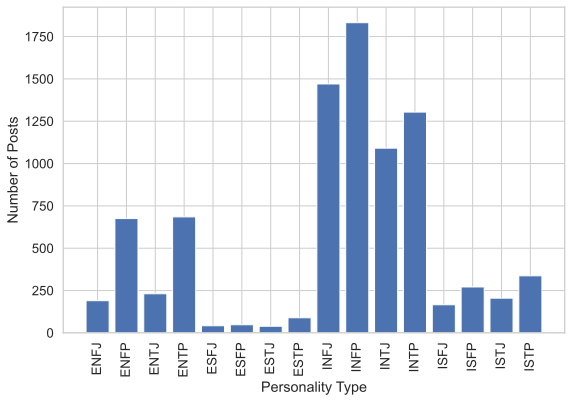

In [35]:
plt.bar(personality_types, post_count)
plt.xticks(rotation=90)
plt.xlabel('Personality Type')
plt.ylabel('Number of Posts')

In [36]:
albert = "Hi, everyone!  I’m a San Francisco native who attended Caltech in Pasadena and has spent time all over the country.  My favorite cities are San Francisco, Boston, Raleigh, and Denver.  I am a bootcamp veteran, having acquired a skill set in web development, and where I, amazingly, met Josh Shaman who now works for Metis.  I bike, play piano, and dance in my spare time."

trans_albert = vectorizer.transform([albert]).toarray()
trans_albert = tfidfconverter.fit_transform(trans_albert).toarray()
classifier.predict(trans_albert)

array(['INFP'], dtype='<U4')